# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [3]:
cities

['college',
 'blackmans bay',
 'bilibino',
 'ribeira grande',
 'pathein',
 'bethel',
 'kaspiyskiy',
 'dalandzadgad',
 'tanguieta',
 'adamstown',
 'la passe',
 'carnarvon',
 'monteagudo',
 'vorkuta',
 'totness',
 'vilyuysk',
 'griffith',
 'taiohae',
 'thanh hoa',
 'puerto ayora',
 'eregli',
 'kindu',
 'ushuaia',
 'kampene',
 'hamilton',
 'tolanaro',
 'grytviken',
 'saint-francois',
 'port-aux-francais',
 'edinburgh of the seven seas',
 'utrik',
 'zaozersk',
 'ciudad insurgentes',
 'porto franco',
 'kodiak',
 'ostersund',
 'puerto san jose',
 'natal',
 'gueltat zemmour',
 'hawaiian paradise park',
 'yellowknife',
 'ajdovscina',
 'lazaro cardenas',
 'afaahiti',
 'camana',
 'ilulissat',
 'stanley',
 'antsiranana',
 'puerto natales',
 'torremolinos',
 'atafu village',
 'mount isa',
 'praia da vitoria',
 'aasiaat',
 'waitangi',
 'nema',
 'merano',
 'dongkan',
 'merizo village',
 'lihue',
 'thompson',
 'shuangjiang',
 'margaret river',
 'port-vila',
 'papatowai',
 'jiuquan',
 'london',
 'curu

In [4]:
#city_test = cities[0:10]
#city_test

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
from pprint import pprint

url = "https://api.openweathermap.org/data/2.5/weather?"
weather_api_key
units= "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:


    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Convert city_unix_date to day
        # city_date = pd.to_datetime(city_unix_date, unit = 'M')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | pathein
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | kaspiyskiy
Processing Record 8 of Set 1 | dalandzadgad
Processing Record 9 of Set 1 | tanguieta
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | monteagudo
Processing Record 14 of Set 1 | vorkuta
Processing Record 15 of Set 1 | totness
Processing Record 16 of Set 1 | vilyuysk
Processing Record 17 of Set 1 | griffith
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | thanh hoa
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | eregli
Processing Record 22 of Set 1 | kindu
Proc

Processing Record 37 of Set 4 | toga village
City not found. Skipping...
Processing Record 38 of Set 4 | shetpe
Processing Record 39 of Set 4 | stettler
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | paramirim
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | pontalina
Processing Record 44 of Set 4 | aomori
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | san antonio de pale
Processing Record 47 of Set 4 | enewetak
Processing Record 48 of Set 4 | tsiombe
Processing Record 49 of Set 4 | kapit
Processing Record 0 of Set 5 | comodoro rivadavia
Processing Record 1 of Set 5 | betare oya
Processing Record 2 of Set 5 | callao
Processing Record 3 of Set 5 | priob'ye
Processing Record 4 of Set 5 | ghosi
Processing Record 5 of Set 5 | happy valley-goose bay
Processing Record 6 of Set 5 | flying fish cove
Processing Record 7 of Set 5 | tazovsky
Processing Record 8 of Set 5 | terra rica
Processing Record 9 of Set 5 | tubarj

Processing Record 28 of Set 8 | sola
Processing Record 29 of Set 8 | santa terezinha
Processing Record 30 of Set 8 | takanabe
Processing Record 31 of Set 8 | ocean city
Processing Record 32 of Set 8 | reggane
Processing Record 33 of Set 8 | karatuzskoye
Processing Record 34 of Set 8 | merida
Processing Record 35 of Set 8 | helena valley west central
Processing Record 36 of Set 8 | pangody
Processing Record 37 of Set 8 | rongelap
Processing Record 38 of Set 8 | baglung
Processing Record 39 of Set 8 | saldanha
Processing Record 40 of Set 8 | springbok
Processing Record 41 of Set 8 | lang son
Processing Record 42 of Set 8 | kikwit
Processing Record 43 of Set 8 | itambacuri
Processing Record 44 of Set 8 | kenora
Processing Record 45 of Set 8 | howard springs
Processing Record 46 of Set 8 | masterton
Processing Record 47 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 48 of Set 8 | sechura
Processing Record 49 of Set 8 | hirara
Processing Record 0 of Set 9 | raduzh

Processing Record 18 of Set 12 | colac
Processing Record 19 of Set 12 | pariaman
Processing Record 20 of Set 12 | alaghsas
Processing Record 21 of Set 12 | nizhniy odes
Processing Record 22 of Set 12 | huayacocotla
Processing Record 23 of Set 12 | hilo
Processing Record 24 of Set 12 | magong
Processing Record 25 of Set 12 | al jubayl
Processing Record 26 of Set 12 | saint-julien-en-genevois
Processing Record 27 of Set 12 | chardara
Processing Record 28 of Set 12 | tokmok
Processing Record 29 of Set 12 | funafuti
Processing Record 30 of Set 12 | glace bay
Processing Record 31 of Set 12 | preobrazheniye
Processing Record 32 of Set 12 | svetlogorsk
Processing Record 33 of Set 12 | hancheng
Processing Record 34 of Set 12 | cabedelo
Processing Record 35 of Set 12 | boende
Processing Record 36 of Set 12 | newport
Processing Record 37 of Set 12 | san rafael del sur
Processing Record 38 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 39 of Set 12 | motueka
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,-17.18,78,75,0.00,US,1707250351
1,blackmans bay,-43.0167,147.3167,12.07,82,97,2.05,AU,1707250351
2,bilibino,68.0546,166.4372,-34.95,100,100,0.68,RU,1707250352
3,ribeira grande,38.5167,-28.7000,17.10,94,75,13.89,PT,1707250353
4,pathein,16.7833,94.7333,22.58,67,0,4.51,MM,1707250354
...,...,...,...,...,...,...,...,...,...
569,albesti,47.7000,27.0667,8.57,73,100,1.77,RO,1707250791
570,maloye ganyushkino,46.6000,49.2667,-0.39,68,28,10.01,KZ,1707250791
571,nouadhibou,20.9310,-17.0347,23.99,38,49,5.66,MR,1707250793
572,semey,50.4111,80.2275,-8.77,78,85,6.04,KZ,1707250793


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-17.18,78,75,0.00,US,1707250351
1,blackmans bay,-43.0167,147.3167,12.07,82,97,2.05,AU,1707250351
2,bilibino,68.0546,166.4372,-34.95,100,100,0.68,RU,1707250352
3,ribeira grande,38.5167,-28.7000,17.10,94,75,13.89,PT,1707250353
4,pathein,16.7833,94.7333,22.58,67,0,4.51,MM,1707250354
...,...,...,...,...,...,...,...,...,...
569,albesti,47.7000,27.0667,8.57,73,100,1.77,RO,1707250791
570,maloye ganyushkino,46.6000,49.2667,-0.39,68,28,10.01,KZ,1707250791
571,nouadhibou,20.9310,-17.0347,23.99,38,49,5.66,MR,1707250793


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

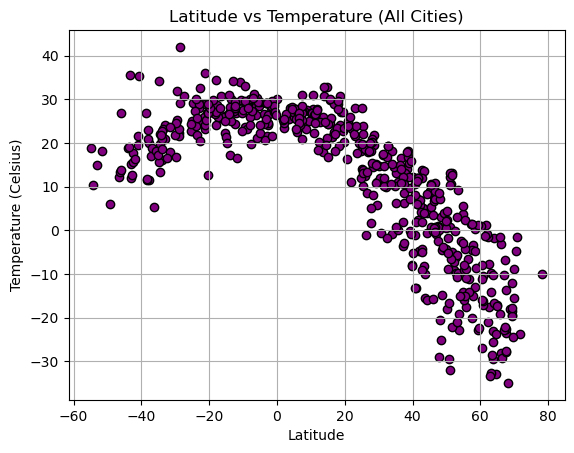

In [10]:
# Build scatter plot for latitude vs. temperature

# Define the x and y axes and values.
lat_v_temp_x = city_data_df["Lat"]
lat_v_temp_y = city_data_df["Max Temp"]

# Incorporate the other graph properties
# Axes labels, put grid in background, purple dots
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("Latitude vs Temperature (All Cities)")
plt.grid(True)
plt.scatter(lat_v_temp_x,lat_v_temp_y, color = "purple", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig1_LatTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

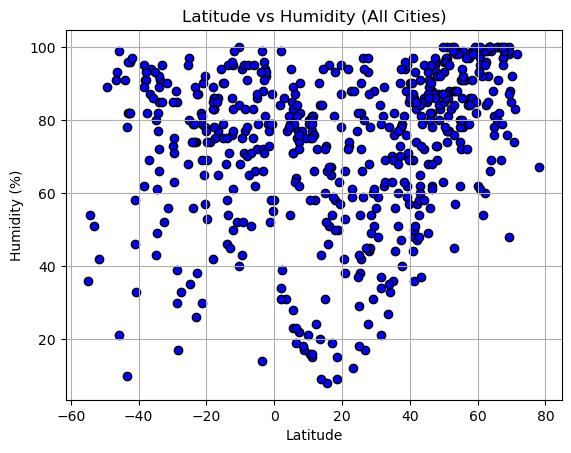

In [11]:
# Build the scatter plots for latitude vs. humidity

# Define x and y axes and values.
lat_v_hum_x = city_data_df["Lat"]
lat_v_hum_y = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity (All Cities)")
plt.scatter(lat_v_hum_x,lat_v_hum_y,color="blue", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig2_LatHum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

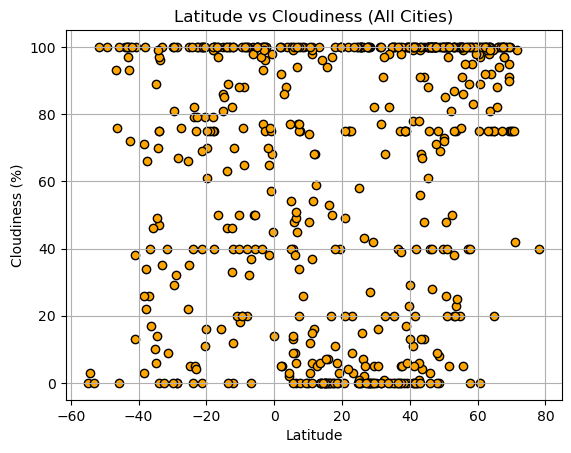

In [12]:
# Build the scatter plots for latitude vs. cloudiness

# Define x and y axes and values.
lat_v_cloud_x = city_data_df["Lat"]
lat_v_cloud_y = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (All Cities)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(lat_v_cloud_x,lat_v_cloud_y,color="orange", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig3_LatCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

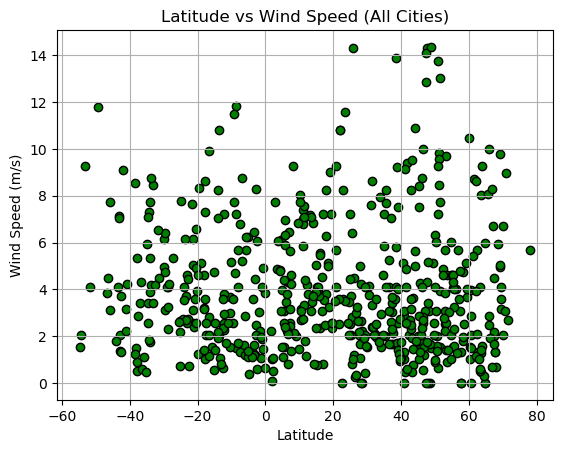

In [13]:
# Build the scatter plots for latitude vs. wind speed

# Define the x and y axes and values.
lat_v_wind_x = city_data_df["Lat"]
lat_v_wind_y = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (All Cities)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(lat_v_wind_x,lat_v_wind_y,color="green", edgecolor="black")

# Save the figure
plt.savefig("../output_data/Fig4_LatWind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def lin_regr(x_values, y_values, xlab, ylab, title):

    # Linear regression on Lat vs <Column/Weather>
    # x_values and y_values are calculated within the specific section cells
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Calculate regression values
    regress_values = x_values * slope + intercept
    print(regress_values)

    # Create line equation string
    line_eq = "y = " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    print(line_eq)

    # Create scatter plot of lat vs <column/weather>, with the linear regression
    plt.scatter(x_values, y_values, color="purple", edgecolor="black")
    plt.plot(x_values,regress_values, "r-")

    # Label and annotate plot components and line equation
    # xmin and ymin are calculated within the specific section cells
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid(True)
    plt.title(title)
    plt.annotate(line_eq , (xmin, ymin), fontsize=15,color="red")

    # Print the r value
    print(f"The r-value is: {rvalue**2}")

    # Show the plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi_df)

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-17.18,78,75,0.00,US,1707250351
2,bilibino,68.0546,166.4372,-34.95,100,100,0.68,RU,1707250352
3,ribeira grande,38.5167,-28.7000,17.10,94,75,13.89,PT,1707250353
4,pathein,16.7833,94.7333,22.58,67,0,4.51,MM,1707250354
5,bethel,41.3712,-73.4140,6.05,48,0,4.12,US,1707250354
...,...,...,...,...,...,...,...,...,...
569,albesti,47.7000,27.0667,8.57,73,100,1.77,RO,1707250791
570,maloye ganyushkino,46.6000,49.2667,-0.39,68,28,10.01,KZ,1707250791
571,nouadhibou,20.9310,-17.0347,23.99,38,49,5.66,MR,1707250793


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df=pd.DataFrame(southern_hemi_df)

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,12.07,82,97,2.05,AU,1707250351
9,adamstown,-25.0660,-130.1015,24.95,80,35,0.72,PN,1707250357
11,carnarvon,-24.8667,113.6333,29.14,35,5,7.78,AU,1707250358
12,monteagudo,-19.8167,-63.9833,27.47,53,61,1.23,BO,1707250359
18,puerto ayora,-0.7393,-90.3518,28.98,79,68,4.90,EC,1707250364
...,...,...,...,...,...,...,...,...,...
557,cabedelo,-6.9811,-34.8339,30.37,71,37,5.19,BR,1707250782
558,boende,-0.2167,20.8667,26.47,55,45,0.63,CD,1707250783
561,motueka,-41.1333,173.0167,19.50,46,38,2.22,NZ,1707250785


###  Temperature vs. Latitude Linear Regression Plot

City_ID
0     -14.261308
2     -16.670330
3       5.582371
4      21.955466
5       3.431902
         ...    
569    -1.335969
570    -0.507272
571    18.830750
572    -3.378406
573     6.360894
Name: Lat, Length: 394, dtype: float64
y = -0.75x + 34.6
The r-value is: 0.768951421227671


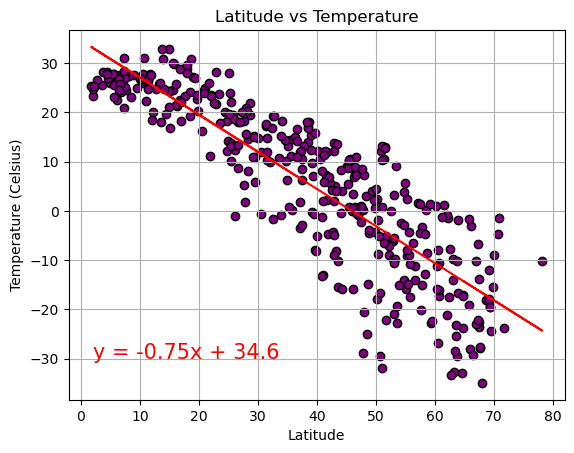

In [67]:
# Linear regression on Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

xmin = int(x_values.min() + 0.5)
ymin = int(y_values.min() + 0.5) + 4

# Calculate and show the plot with linear regression using the previously defined function.
lin_regr(x_values,y_values,"Latitude","Temperature (Celsius)","Latitude vs Temperature")

City_ID
1      19.322214
9      23.520491
11     23.567103
12     24.748188
18     29.209976
         ...    
557    27.750155
558    29.332200
561    19.762700
563    19.590472
564    23.442376
Name: Lat, Length: 180, dtype: float64
y = 0.23x + 29.38
The r-value is: 0.3019243186693347


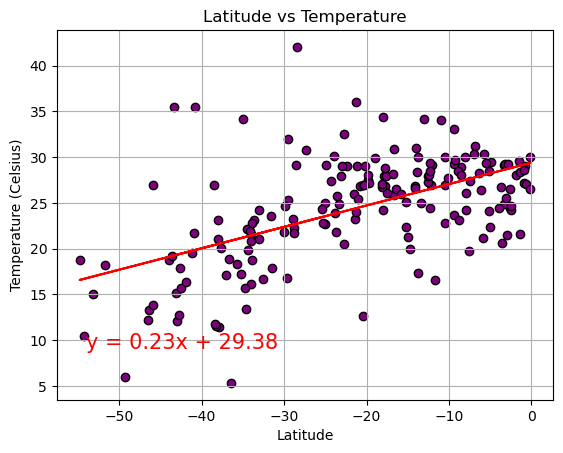

In [69]:
# Linear regression on Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

xmin = int(x_values.min() + 0.5)
ymin = int(y_values.min() + 0.5) + 4

# Calculate and show the plot with linear regression using the previously defined function.
lin_regr(x_values,y_values, "Latitude", "Temperature (Celsius)", "Latitude vs Temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

City_ID
0      87.351811
2      89.030878
3      73.520946
4      62.109046
5      75.019803
         ...    
569    78.342966
570    77.765372
571    64.286944
572    79.766526
573    72.978322
Name: Lat, Length: 394, dtype: float64
y = 0.53x + 53.3
The r-value is: 0.2132213213227499


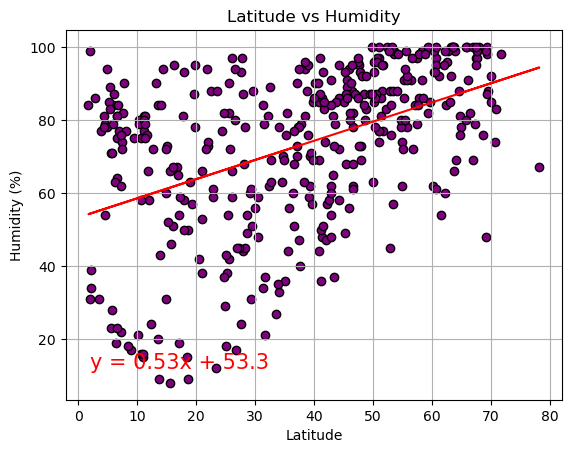

In [70]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

xmin = int(x_values.min() + 0.5)
ymin = int(y_values.min() + 0.5) + 4

# Calculate and show the plot with linear regression using the previously defined function.
lin_regr(x_values,y_values, "Latitude", "Humidity (%)", "Latitude vs Humidity")


City_ID
1      71.119342
9      73.228251
11     73.251665
12     73.844956
18     76.086232
         ...    
557    75.352925
558    76.147629
561    71.340611
563    71.254096
564    73.189011
Name: Lat, Length: 180, dtype: float64
y = 0.12x + 76.17
The r-value is: 0.007101079801888851


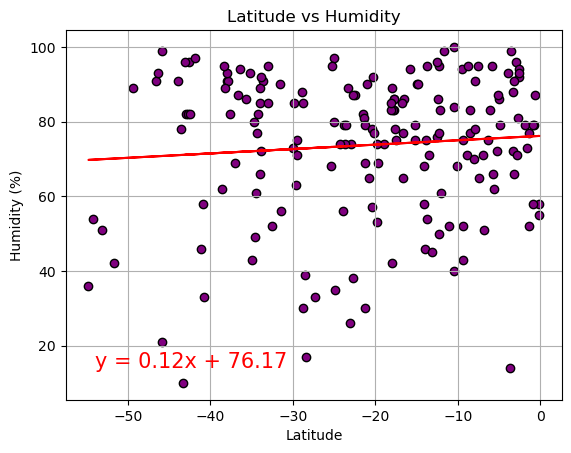

In [73]:
# Southern Hemisphere
# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

xmin = int(x_values.min() + 0.5)
ymin = int(y_values.min() + 0.5) + 4

# Calculate and show the plot with linear regression using the previously defined function.
lin_regr(x_values,y_values, "Latitude", "Humidity (%)", "Latitude vs Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
0      82.016549
2      84.534590
3      61.274858
4      44.160809
5      63.522645
         ...    
569    68.506283
570    67.640084
571    47.426931
572    70.641149
573    60.461103
Name: Lat, Length: 394, dtype: float64
y = 0.79x + 30.94
The r-value is: 0.13864658872177585


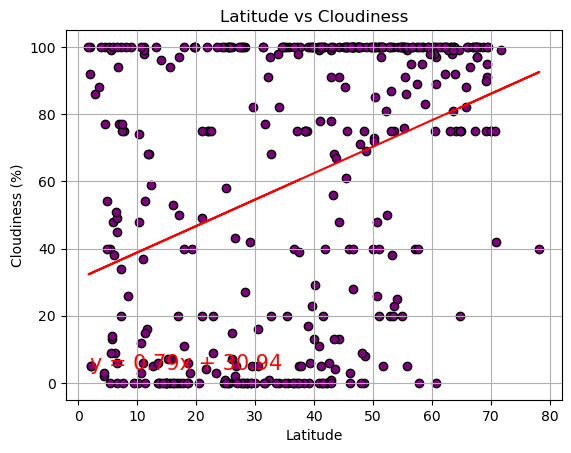

In [74]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

xmin = int(x_values.min() + 0.5)
ymin = int(y_values.min() + 0.5) + 4

# Calculate and show the plot with linear regression using the previously defined function.
lin_regr(x_values,y_values, "Latitude", "Cloudiness (%)", "Latitude vs Cloudiness")


City_ID
1      55.600771
9      62.941127
11     63.022624
12     65.087658
18     72.888741
         ...    
557    70.336360
558    73.102441
561    56.370926
563    56.069799
564    62.804548
Name: Lat, Length: 180, dtype: float64
y = 0.41x + 73.19
The r-value is: 0.025605012247549266


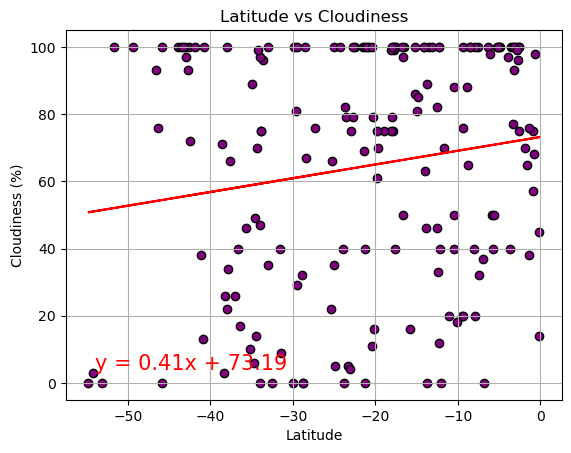

In [75]:
# Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

xmin = int(x_values.min() + 0.5)
ymin = int(y_values.min() + 0.5) + 4


# Calculate and show the plot with linear regression using the previously defined function.
lin_regr(x_values,y_values, "Latitude", "Cloudiness (%)", "Latitude vs Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
0      3.800870
2      3.790767
3      3.884087
4      3.952750
5      3.875069
         ...   
569    3.855074
570    3.858549
571    3.939646
572    3.846509
573    3.887352
Name: Lat, Length: 394, dtype: float64
y = -0.0x + 4.01
The r-value is: 0.00045099476851974


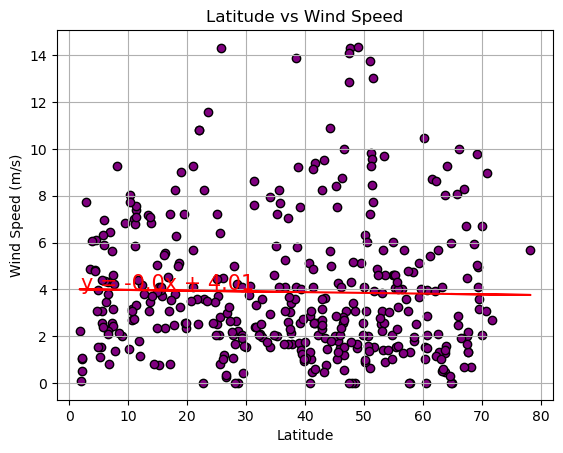

In [76]:
# Northern Hemisphere

# Define the x and y values for the formula
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

xmin = int(x_values.min() + 0.5)
ymin = int(y_values.min() + 0.5) + 4

# Calculate and show the plot with linear regression using the previously defined function.
lin_regr(x_values,y_values, "Latitude", "Wind Speed (m/s)", "Latitude vs Wind Speed")

City_ID
1      4.396288
9      3.984591
11     3.980021
12     3.864200
18     3.426663
         ...   
557    3.569817
558    3.414677
561    4.353092
563    4.369981
564    3.992252
Name: Lat, Length: 180, dtype: float64
y = -0.02x + 3.41
The r-value is: 0.015580204219554748


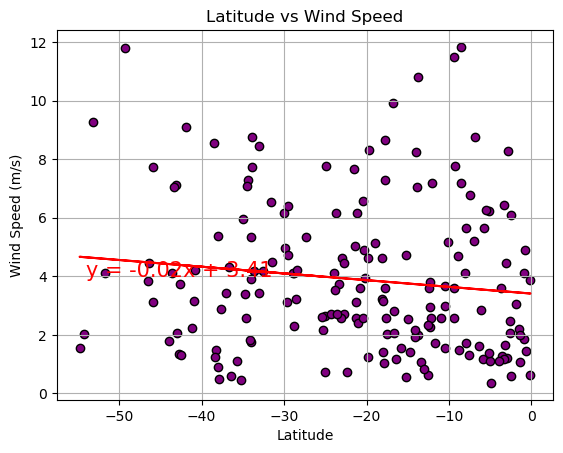

In [78]:
# Southern Hemisphere

# Define the x and y values for the formula
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

xmin = int(x_values.min() + 0.5)
ymin = int(y_values.min() + 0.5) + 4

# Calculate and show the plot with linear regression using the previously defined function.
lin_regr(x_values,y_values, "Latitude", "Wind Speed (m/s)", "Latitude vs Wind Speed")


**Discussion about the linear relationship:** YOUR RESPONSE HERE